# Machine Learning Project- Trustworthy Sites
 *by Brandon Jungen, May 8, 2019*

## Introduction

I am looking to use machine learning to tell if a website is trustworthy or untrustworthy through a classification algorithm. The algorithm will be looking at the data from the UCI Machine Learnign Repository that is called "Dishonest Internet users dataset.txt". This data has been tunred into discrete values from their study on it. So the algorithm will look at the data that they have gathered on sites to predict if a new site would be trustworthy or not based on data collected from the site.

## Methods

I will be using the classification code that was given in class to train a neural net on this data. I feel like this will be a good way to give out classified results since I have used the code on another project and understand how the code works.

In [206]:
import neuralnetworks as nn

Here is the description as given from Project A4 -  
This code defines the class `NeuralNetworkClassifier_Pytorch`.  The constructor for this class accepts the arguments

  * `n_inputs`: (int) number of input components, which is the number of channels for a convolutional net, or the total number of pixels for a fully connected network
  * `n_hiddens_by_layer`: (list of ints) number of units in each hidden layer
  * `n_outputs`: (int) number of classes in the data
  * `relu`: (boolean, default False) if True, relu is used as the activation function. If False, the activation function is tanh
  * `gpu`: (boolean, default False) If True and this machine has a compatible GPU, run the network on the GPU
  * `n_conv_layers`: (int, default 0) 0 to create all layers as fully connected, else create this many convolutional layers as the initial layers in the network
  * `windows`: (list of ints, default [ ]) if all layers are fully connected, this should be empty. If network contains convolutional layers this must be a list of length equal to `n_conv_layers`, with an int for each layer specifying the height and width of the convolution window
  * `strides`: (list of ints, default [ ]) if all layers are fully connected, this should be empty. If network contains convolutional layers this must be a list of length equal to `n_conv_layers`, with an int for each layer specifying the horizontal and vertical stride ofthe convolution window
  * `input_height_width`: (int or None, default value) height and width of input image but only needed for convolutional network

Then train this neural network using the `train` function

  * `Xtrain`: (np.ndarray of floats) training samples along first dimension
  * `Ttrain`: (np.ndarray of longs) one-dimensional vector of integers indicating class of each training sample
  * `Xtest`: (np.ndarray of floats) testing samples along first dimension
  * `Ttest`: (np.ndarray of longs) one-dimensional vector of integers indicating class of each testing sample,
  * `n_iterations`: (int) number of optimization steps, sometimes called epochs
  * `batch_size`: (int) number of samples in each batch to calculate gradient for and update all weights
  * `learning_rate`: (float) factor multiplying gradient to determine step size

Once a neural net is created, with a line like

     nnet = nn.NeuralNetworkClassifier_Pytorch(1, [10, 20, 5], 10, 
               n_conv_layers=2, windows=[5, 7], strides=[1, 2], input_height_width=28)

it can be trained with a line like

     nnet.train(Xtrain, Ttrain, Xtest, Ttest, 200, 100, 0.001)
     
and predictions are made with

     classes, probs = nnet.use(Xtrain)

where `classes` are the predicted classes for each sample and `prob` is the probability of each class for each sample.

Then to see the amount that was predicted correct I will use another function that was given from class which is the function below.

In [207]:
def percent_correct(actual, predicted):
    return 100 * np.mean(actual == predicted)

The next step is to get the data into a format that we can work with. Now since the data has come in as a string what I will do is to scan each row and column and find a integer in the data and convert that cell into the integer that was found in the string. This will remove the characters that we do not want in the nerural net. Then we can start training with the data. To do this I will be using pandas to read in the data and to format it for the numpy array.

In [208]:
import pandas as pd

In [209]:
data = pd.read_csv("Dishonest Internet users dataset.txt", sep=" ", header = None)
data.columns = ["Counting Trust", "Counting Un-trust", "Last Time", "Transaction Context", "Trust Score"]
data

Counting Trust Counting Un-trust   Last Time Transaction Context  \
0       CT_range_4        CU_range_1  LT_range_4               sport   
1       CT_range_4        CU_range_1  LT_range_4               sport   
2       CT_range_1        CU_range_4  LT_range_4               sport   
3       CT_range_2        CU_range_1  LT_range_4               sport   
4       CT_range_3        CU_range_1  LT_range_4               sport   
5       CT_range_4        CU_range_1  LT_range_4               sport   
6       CT_range_1        CU_range_4  LT_range_4               sport   
7       CT_range_2        CU_range_1  LT_range_4               sport   
8       CT_range_3        CU_range_1  LT_range_4               sport   
9       CT_range_4        CU_range_1  LT_range_4               sport   
10      CT_range_1        CU_range_4  LT_range_4               sport   
11      CT_range_2        CU_range_1  LT_range_4               sport   
12      CT_range_3        CU_range_1  LT_range_4               sport   
13      CT_range_4        CU_range_1  LT_range_4               sport   
14      CT_range_1        CU_range_4  LT_range_4               sport   
15      CT_range_1        CU_range_4  LT_range_4               sport   
16      CT_range_2        CU_range_1  LT_range_4               sport   
17      CT_range_3        CU_range_1  LT_range_4               sport   
18      CT_range_4        CU_range_1  LT_range_4               sport   
19      CT_range_1        CU_range_3  LT_range_4               sport   
20      CT_range_2        CU_range_1  LT_range_4               sport   
21      CT_range_3        CU_range_1  LT_range_4               sport   
22      CT_range_4        CU_range_1  LT_range_4               sport   
23      CT_range_1        CU_range_3  LT_range_4               sport   
24      CT_range_2        CU_range_1  LT_range_4               sport   
25      CT_range_3        CU_range_1  LT_range_4               sport   
26      CT_range_4        CU_range_1  LT_range_4               sport   
27      CT_range_1        CU_range_3  LT_range_4               sport   
28      CT_range_2        CU_range_1  LT_range_4               sport   
29      CT_range_3        CU_range_1  LT_range_4               sport   
..             ...               ...         ...                 ...   
292     CT_range_1        CU_range_1  LT_range_1             holiday   
293     CT_range_2        CU_range_1  LT_range_2             holiday   
294     CT_range_2        CU_range_1  LT_range_2             holiday   
295     CT_range_1        CU_range_1  LT_range_1             holiday   
296     CT_range_1        CU_range_1  LT_range_1             holiday   
297     CT_range_1        CU_range_1  LT_range_1             holiday   
298     CT_range_2        CU_range_1  LT_range_2             holiday   
299     CT_range_2        CU_range_1  LT_range_2             holiday   
300     CT_range_1        CU_range_1  LT_range_1             holiday   
301     CT_range_1        CU_range_1  LT_range_1             holiday   
302     CT_range_1        CU_range_1  LT_range_1             holiday   
303     CT_range_2        CU_range_1  LT_range_2             holiday   
304     CT_range_1        CU_range_1  LT_range_1             holiday   
305     CT_range_1        CU_range_1  LT_range_1             holiday   
306     CT_range_1        CU_range_1  LT_range_1             holiday   
307     CT_range_2        CU_range_1  LT_range_2             holiday   
308     CT_range_2        CU_range_1  LT_range_2             holiday   
309     CT_range_1        CU_range_1  LT_range_1             holiday   
310     CT_range_1        CU_range_1  LT_range_1             holiday   
311     CT_range_1        CU_range_1  LT_range_1             holiday   
312     CT_range_2        CU_range_1  LT_range_2             holiday   
313     CT_range_1        CU_range_1  LT_range_1             holiday   
314     CT_range_1        CU_range_1  LT_range_1             holiday   
315     CT_range_1        CU_range_1  LT_ran

So we can see here that we need to change all of these values into something that we can work with. So first will be to go over the first three columns and change those to the discrete values that they already have.

In [210]:
def tranContext(TC):
    return {
        "sport": 0,
        "game": 1,
        "ECommerce": 2,
        "holiday": 3,
    }[TC]

This functions purpose is to convert the transaction context column into a descrete value. This is done with a dictionary mapping where we know what the passed in paramaters will be. This allows me to give a descrete value to each transaction context given in the data. The mapping was as follows, sport=0, game=1, ECommerce=2, and holiday=3

In [211]:
def trustScore(TS):
    return {
        "trustworthy": 0,
        "untrustworthy": 1
    }[TS]

This functions purpose is to convert the Trust Score column to a descrete value. Here I again used a dictionary mapping in order to change the values into the desired value. Here was converted trustworthy to 0 and untrustworthy to 1.

In [212]:
import re
index = 0
for row in data.itertuples(index=False):
    CT = re.findall(r'\d+', row[0])
    CU = re.findall(r'\d+', row[1])
    LT = re.findall(r'\d+', row[2])
    TC = tranContext(row[3])
    TS = trustScore(row[4])
    data.at[index, "Counting Trust"] = str(CT[0])
    data.at[index, "Counting Un-trust"] = str(CU[0])
    data.at[index, "Last Time"] = str(LT[0])
    data.at[index, "Transaction Context"] = str(TC)
    data.at[index, "Trust Score"] = str(TS)
    index += 1
    #print(temp)
    #data.at[row, "Counting Trust"] = str(temp[0])
print(data)

    Counting Trust Counting Un-trust Last Time Transaction Context Trust Score
0                4                 1         4                   0           1
1                4                 1         4                   0           1
2                1                 4         4                   0           0
3                2                 1         4                   0           0
4                3                 1         4                   0           0
5                4                 1         4                   0           1
6                1                 4         4                   0           0
7                2                 1         4                   0           0
8                3                 1         4                   0           0
9                4                 1         4                   0           1
10               1                 4         4                   0           0
11               2                 1         4      

So the data has now been put into a discrete format that a machine learning algorithm can use to learn. The only things changed was to give the sites transaction context to discrete values, where sports=0, game=1, ECommerce=2, and holiday=3. Then for the desired output we have trustworthy=0 and untrustworthy=1.

After getting the data into a format that is usuable I will now train the neural network multipule times in order to see what the best run paramaters are. This will take some trial and error and time to figure out what runs best and what does not work as well.

The first step is to split that data into a training set and a test set. Then to also seperate the target from the testing data so that we can go back and use the given targets to see how well our neural net is doing with it's predictions.

In [213]:
pd.isna(data)

Counting Trust  Counting Un-trust  Last Time  Transaction Context  \
0             False              False      False                False   
1             False              False      False                False   
2             False              False      False                False   
3             False              False      False                False   
4             False              False      False                False   
5             False              False      False                False   
6             False              False      False                False   
7             False              False      False                False   
8             False              False      False                False   
9             False              False      False                False   
10            False              False      False                False   
11            False              False      False                False   
12            False              False      False                False   
13            False              False      False                False   
14            False              False      False                False   
15            False              False      False                False   
16            False              False      False                False   
17            False              False      False                False   
18            False              False      False                False   
19            False              False      False                False   
20            False              False      False                False   
21            False              False      False                False   
22            False              False      False                False   
23            False              False      False                False   
24            False              False      False                False   
25            False              False      False                False   
26            False              False      False                False   
27            False              False      False                False   
28            False              False      False                False   
29            False              False      False                False   
..              ...                ...        ...                  ...   
292           False              False      False                False   
293           False              False      False                False   
294           False              False      False                False   
295           False              False      False                False   
296           False              False      False                False   
297           False              False      False                False   
298           False              False      False                False   
299           False              False      False                False   
300           False              False      False                False   
301           False              False      False                False   
302           False              False      False                False   
303           False              False      False                False   
304           False              False      False                False   
305           False              False      False                False   
306           False              False      False                False   
307           False              False      False                False   
308           False              False      False                False   
309           False              False      False                False   
310           False              False      False                False   
311           False              False      False                False   
312           False              False      False                False   
313           False              False      False                False   
314      

This shows us that there are no nan values so we can now convert the data into a numpy array and start using that for our manipulation to make the training set and the testing data.

In [214]:
import numpy as np

In [215]:
data = data.values
data = np.array(data, dtype='int')
print(data)

[[4 1 4 0 1]
 [4 1 4 0 1]
 [1 4 4 0 0]
 ...
 [1 1 1 3 0]
 [1 1 1 3 0]
 [2 1 2 3 1]]


In [216]:
X = data[:, [0, 1, 2, 3]]
T = data[:, [4]]
X.shape, T.shape

((322, 4), (322, 1))

In [217]:
def split(X, T, trainFrac=0.8, testFrac = 0.1, validFrac=0.1):
    if trainFrac + testFrac + validFrac != 1:
        print("Fractions must sum to 1")
        return
    n = X.shape[0]
    nTrain = round(trainFrac * n)
    nValid = round(validFrac * n)
    nTest = round(testFrac * n)
    if nTrain + nTest != n:
        nTest= n - nTrain - nValid
    row = np.arange(X.shape[0])
    np.random.shuffle(row)
    Xtrain = X[row[:nTrain], :]
    Ttrain = T[row[:nTrain], :]
    Xtest = X[row[nTrain: nTrain + nTest], :]
    Ttest = T[row[nTrain: nTrain + nTest], :]
    Xvalid = X[row[nTrain + nTest: nTrain + nTest + nValid], :]
    Tvalid = T[row[nTrain + nTest: nTrain + nTest + nValid], :]
    return Xtrain, Ttrain, Xtest, Ttest, Xvalid, Tvalid

In [218]:
Xtrain, Ttrain, Xtest, Ttest, Xvalid, Tvalid = split(X, T)
Xtrain.shape, Ttrain.shape, Xtest.shape, Ttest.shape, Xvalid.shape, Tvalid.shape

((258, 4), (258, 1), (32, 4), (32, 1), (32, 4), (32, 1))

I did the data split function before I remembered that this classification package didn't require the data to be split and did that for you as long as you sperated the inputs from the target

In [219]:
nnet = nn.NeuralNetworkClassifier(4, [50, 50, 50], 2)
nnet.train(X, T, nIterations=100, verbose=True)

SCG: Iteration 10 fValue 0.09411295580750563 Scale 0.07956516469396784
SCG: Iteration 20 fValue 0.023691833960115878 Scale 7.770035614645296e-05
SCG: Iteration 30 fValue 0.014382074840001173 Scale 0.002486411396686495
SCG: Iteration 40 fValue 0.001976437972434935 Scale 0.00015540071229290593
SCG: Iteration 50 fValue 0.00010325001919048616 Scale 1.5175850809854095e-07
SCG: Iteration 60 fValue 3.923826095790851e-06 Scale 1.482016680649814e-10
SCG: Iteration 70 fValue 1.277277694825708e-07 Scale 1.447281914697084e-13
SCG: Iteration 80 fValue 4.080623879864211e-09 Scale 1e-15
2.142683124490854e-16


NeuralNetwork(4, [50, 50, 50], 2)
   Network was trained for 87 iterations. Final error is 3.687222221890884e-10.

Now we see that I have a working neural net that works for classification. So now I will run all the tests on different run paramaters to try and find an optimal training paramaters for the best results on data.

In [220]:
hidden = [[0]] + [[nu] * nl for nu in [1, 5, 10, 20, 50] for nl in [1, 2, 3, 4, 5]]
hidden

[[0],
 [1],
 [1, 1],
 [1, 1, 1],
 [1, 1, 1, 1],
 [1, 1, 1, 1, 1],
 [5],
 [5, 5],
 [5, 5, 5],
 [5, 5, 5, 5],
 [5, 5, 5, 5, 5],
 [10],
 [10, 10],
 [10, 10, 10],
 [10, 10, 10, 10],
 [10, 10, 10, 10, 10],
 [20],
 [20, 20],
 [20, 20, 20],
 [20, 20, 20, 20],
 [20, 20, 20, 20, 20],
 [50],
 [50, 50],
 [50, 50, 50],
 [50, 50, 50, 50],
 [50, 50, 50, 50, 50]]

In [221]:
import matplotlib.pyplot as plt
%matplotlib inline

In [222]:
hidTest = []
for hid in hidden:
    nnet = nn.NeuralNetworkClassifier(4, hid, 2)
    nnet.train(Xtrain, Ttrain)
    predTest, probs, _ = nnet.use(Xtest, allOutputs=True)
    hidTest.append(percent_correct(Ttest, predTest))

8.2459019164535e-21
1.1056848440529175e-16
1.1310583710980414e-16
1.9030250326797626e-16
1.6548947379498186e-16
1.2346854762338285e-16
1.482435900964348e-16
2.1248705854957353e-16
2.0442359667623932e-16
8.791416836095257e-17
1.5979116107853863e-16
3.179255823407903e-17
1.8434923653277017e-16
1.7810501183112914e-16
7.609701587508665e-17
1.435577151568758e-16
5.657804694122129e-17


Now we have a percent correct list to graph against the number of hidden units that we tested with.

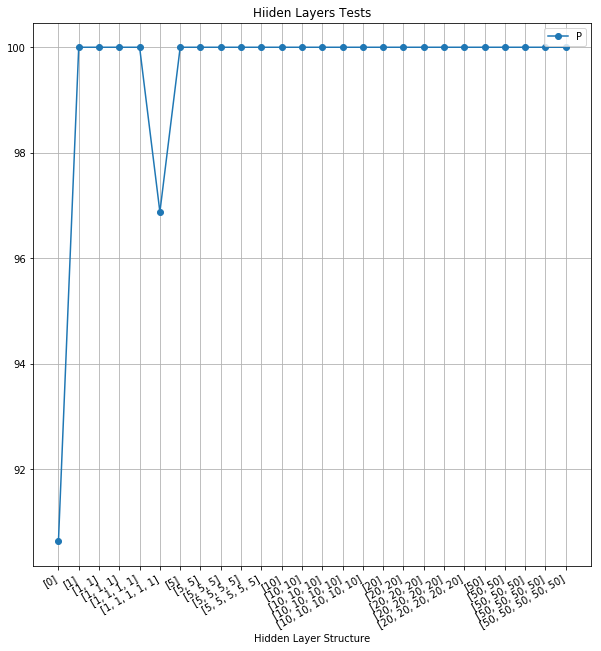

In [223]:
plt.figure(figsize=(10, 10))
plt.plot(hidTest, 'o-')
plt.legend('Percent Correct')
plt.xticks(range(len(hidTest)), hidden, rotation=30, horizontalalignment='right')
plt.xlabel('Hidden Layer Structure')
plt.grid(True)
plt.title('Hiiden Layers Tests')
plt.show()

So here I see that the percent correct on the test data does not change after you get 5 hidden units. The layering of the hidden units does not change the percent correct after 5 hidden units as well. So with this information I know that I can make the neural netwrok with 5 hidden units and 1 hidden layer. I will do this because with the lack of change past a single layer of 5 hidden units there is no change. So we will go with the simpilest hidden layer structure to keep training time short and accurate. I will run this test again below to show that this is consistent and not just a one time result.

In [224]:
hidTest = []
for hid in hidden:
    nnet = nn.NeuralNetworkClassifier(4, hid, 2)
    nnet.train(Xtrain, Ttrain)
    predTest, probs, _ = nnet.use(Xtest, allOutputs=True)
    hidTest.append(percent_correct(Ttest, predTest))

8.2459019164535e-21
1.921983750816825e-16
9.350345095697667e-17
6.845768355282442e-17
6.191880830756963e-17
1.0088412258512116e-16
1.9764295207035273e-16
1.817867522223737e-16
3.101810710721996e-17
1.359613733250765e-16
9.32822228059107e-17
1.1651826641972533e-16
1.406442971224895e-16
8.843109687092759e-17
9.982789179815285e-17
2.04226876060297e-16
9.759953111794939e-17
1.0036069886291398e-17


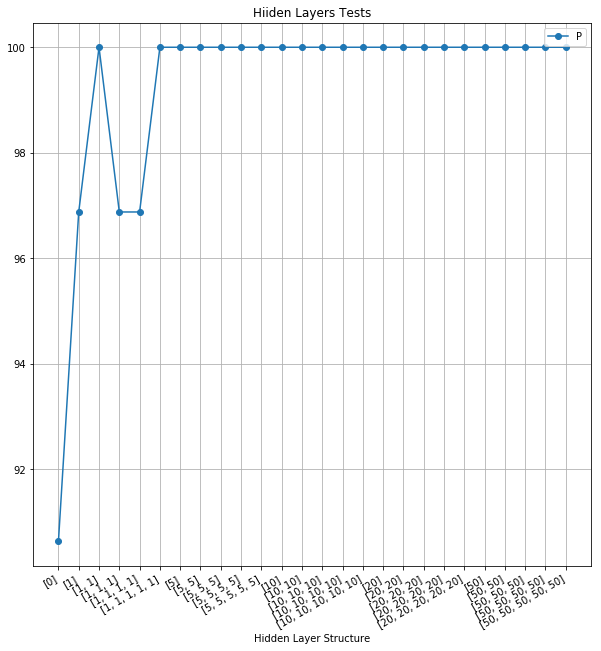

In [225]:
plt.figure(figsize=(10, 10))
plt.plot(hidTest, 'o-')
plt.legend('Percent Correct')
plt.xticks(range(len(hidTest)), hidden, rotation=30, horizontalalignment='right')
plt.xlabel('Hidden Layer Structure')
plt.grid(True)
plt.title('Hiiden Layers Tests')
plt.show()

In [226]:
nnet = nn.NeuralNetworkClassifier(4, [5], 2)
ite = [1, 10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900,
       1000, 2000, 3000, 4000, 5000, 10000]
iteGraph = []
for i in ite:
    test = [i]
    iteGraph.append(test)
itTest = []
for it in ite:
    nnet.train(Xtrain, Ttrain, nIterations=it)
    predTest, probs, _ = nnet.use(Xtest, allOutputs=True)
    itTest.append(percent_correct(Ttest, predTest))

1.7808414625455493e-16
1.9206619092023512e-16
1.6815412609626943e-16
1.998931838167543e-16
1.998931838167543e-16
1.998931838167543e-16
1.998931838167543e-16
1.998931838167543e-16
1.998931838167543e-16
1.998931838167543e-16
1.998931838167543e-16
1.998931838167543e-16
1.998931838167543e-16
1.998931838167543e-16
1.998931838167543e-16


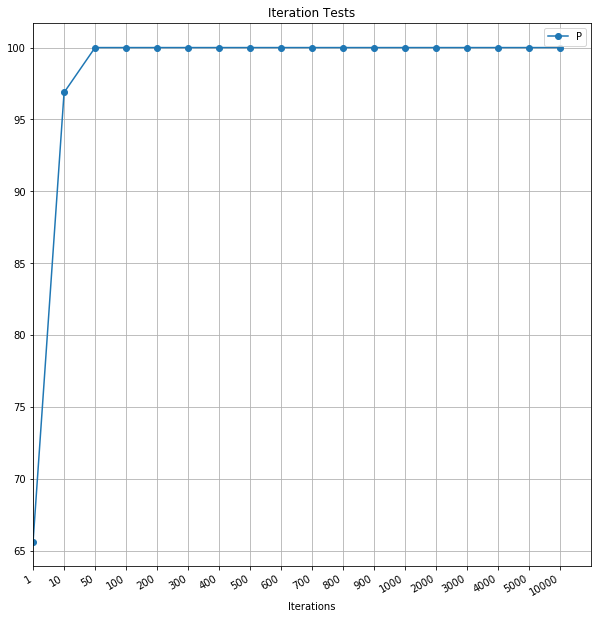

In [227]:
plt.figure(figsize=(10, 10))
plt.plot(itTest, 'o-')
plt.legend('Percent Correct')
plt.xticks(range(len(itTest)), ite, rotation=30, horizontalalignment='right')
plt.xlabel('Iterations')
plt.xlim(0, 18)
plt.grid(True)
plt.title('Iteration Tests')
plt.show()

So now we see that the percent correct levels off after about 50 iterations. That is really luck becuase that means that the neural net can be trained with 50 iterations in order to reach some of the best results on the test data. This is also good because this shows that it was not overtrianed on the training data and does a good job agianst other data.

Now the last thing to do is to make a nerual network with the best paramaters we found, make some test data that I control. Then test to see how the neural network does at predicting new data given to it.

In [228]:
nnet = nn.NeuralNetworkClassifier(4, [5], 2)
nnet.train(Xtrain, Ttrain, nIterations=50)

NeuralNetwork(4, [5], 2)
   Network was trained for 50 iterations. Final error is 7.471164657671349e-08.

Now that I have a nerual network that seems to do fairly good against data. This is from all the tests that I ran. The last step is to see if the network works or not. This will be done by createing a validating data set of new data and then using that data in the neural network. The validation data set will be data that has been kept out of training and testing when the data was split earlier.

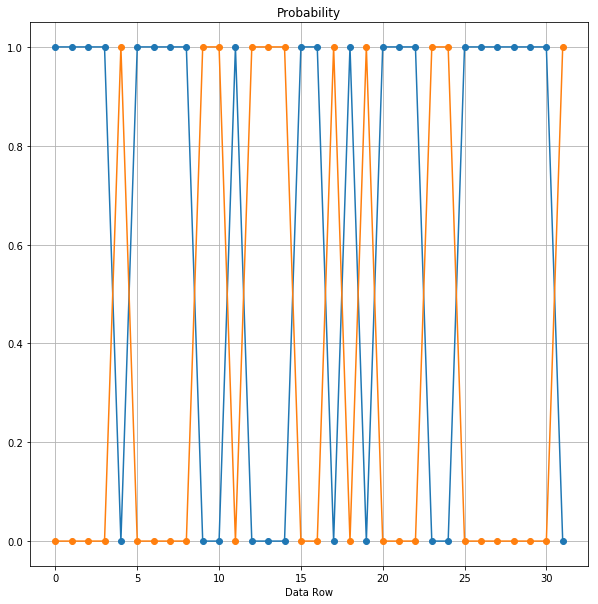

In [229]:
plt.figure(figsize=(10, 10))
plt.plot(probs, 'o-')
plt.xlabel('Data Row')
plt.grid(True)
plt.title('Probability')
plt.show()

The two lines are the probability to be either of the values that we are trying to reach. So in this case it was a 0 for a trustworthy site and a 1 for untrustworthy. In this graph the final decision was the orange line. It would make sense that the probability would be pretty even since there is only two different options to see.

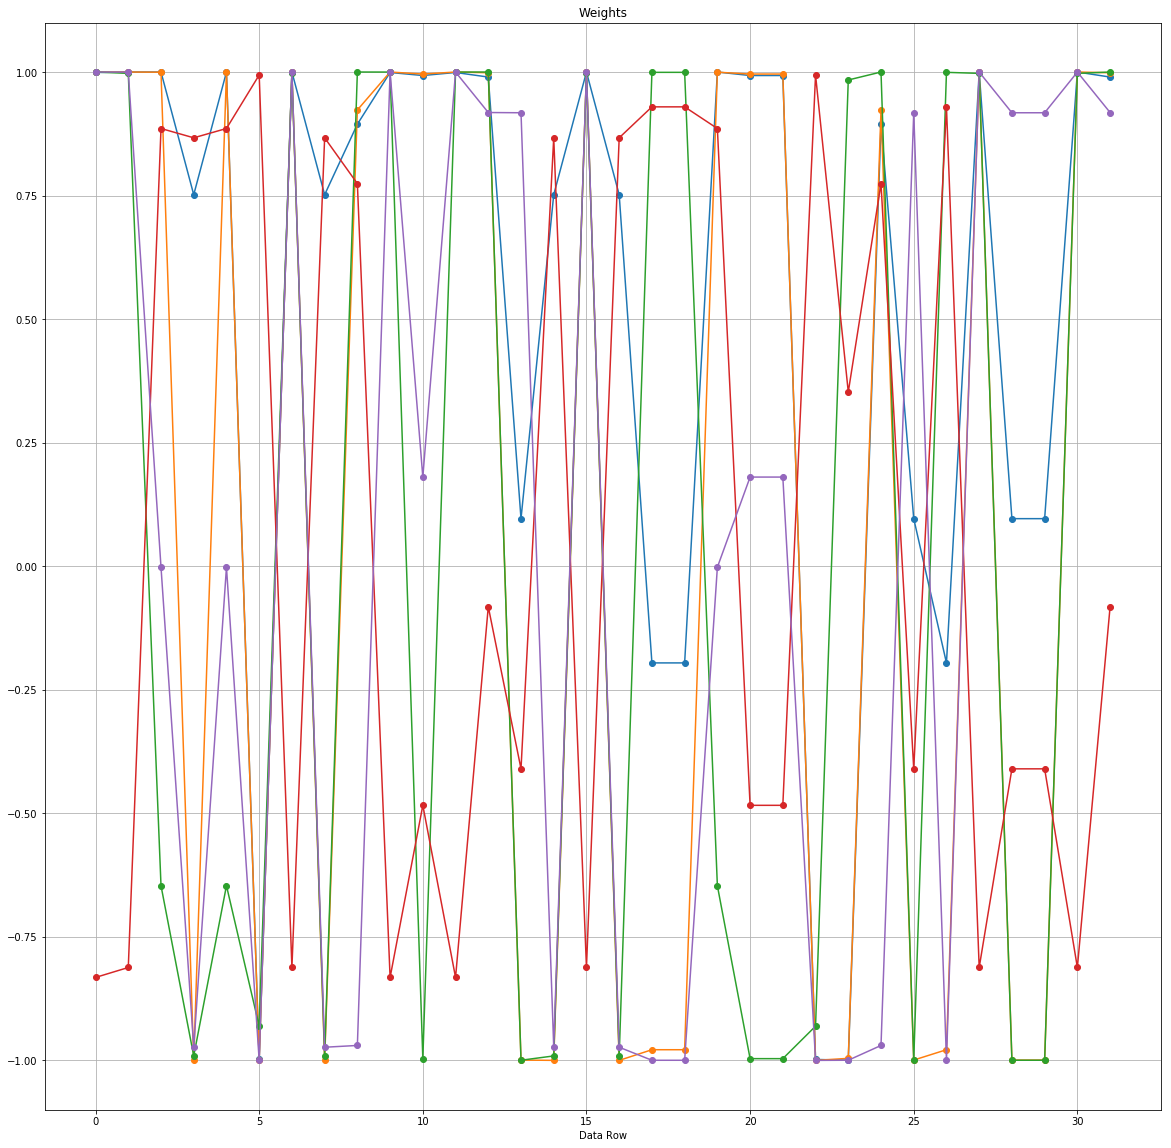

In [230]:
plt.figure(figsize=(20, 20))
plt.plot(weights[0], 'o-')
plt.xlabel('Data Row')
plt.grid(True)
plt.title('Weights')
plt.show()

Here is the weight decisions for each row in the validation test set. So this was the weight given to each row of data that was used to validate the neural network. This allows us a little peak into how it made it's decesion for each row of data. Where the data row is the X axis and then each line is a column of the data. So we can see how the neural network thought was more important to the decision for that site and how it made the predictions that it made. Overall we see that the network was giving out various weights, showing that it used all the data that it was given to help make the decisions that it came to. This is good to see since we know that the network did not just look at one column of data and give that column a high weight and then just make decisions based on that weight. That is important becuase in our data it is key that the network learn to use all of the values it was given to make the decisions on weither the site is trustworthy or untrustworthy.

In [231]:
predTest, probs, weights = nnet.use(Xvalid, allOutputs=True)
print(np.c_[predTest, Tvalid])
print(percent_correct(predTest, Tvalid))

[[1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]]
100.0


So the predictied values are the ones on the left, and then the values on the right are the ones that the neural net predicted. This shows that the validation is good and that the neural net can predict new datat given to it and that it was not overtrained on the training data that was used. This shows that the neural network is ready to take in new values.

## Results

The results can vary per run, but for the most part when looking at the validation tests, the results would range from 93 to 100 percent correct on the predictions. This gives us a good feel for how new data will be becuase this is data that was pulled from the data set the the network has not seen before. So those will be the results focused on in this section.

The results gathered here is that given data like that from the data set, the nerual network can get anywhere from 93 to 100 percent of websites correctly predictied if they are trustworthy or untrustworthy websites depending on the partitioning of the data and the run results. This is interesting because that means that if you visit 100 websites a day, and use the neural network to make sure that you are browsing safely then out of the 100 websites you will be safe on 93 of them, while only viewing around 7 untrustworthy websites. Now this might be alright because an experienced web user might be able to spot if they are on a website that does not seem as turstworty as maybe it should be. So, if they are an experience web user then this might not be an issue and they would want to use this to their advantage. Then if the person is not as experienced then this could be an issue. But there are so many different factors, like the only data that could be stolen and used maliciously could be their email. Then they are just recieving spam. If that is the case then the user can quickly fix that by blocking the sender. The worst case on data being stolen would be credit card or banking info. If that was the case then it is a bigger issue. So even though it might not work all the time, it would still possibly help an inexperienced internet user browse the web a little safer. I think this would not work for companies that have very sensitive data though, becasue if the nerual net misses a key site that then steals all that companies data then that could be catastrophic for the company. So, this could have a more consumer based application as opposed to a commercial use. All in all the results were pretty good with the neural net getting 96 percent on the testing data. Then it was validated after using the validation test set to make sure that the neural net was not over fitting for the training data.

## Conclusions

In conclusion I think that this is a usable application for some safe browsing for a low level consumer that only wants a little extra assurance that they would be on a safe site. This would also maybe help teach some people to be able to tell if they are on a untrustworthy website as opposed to a trustworty website. So the applications for this is there and can be utilized. I think the biggest issue would be collecting the data to use in the neural network as it was based on descrete scores that were given out after research. So to do this for a lot of websites would be very difficult and could take longer than needed for websites and could not do an on load assesment. I think this could be a start but it is not a final product. This just shows that nerual networks could be used in order to help with safe browsing and could imporve internet browsing experience for many. This still has a long way to go before you could use it effectively but it looks very promosing.

### References

* UCI Machine Learning - https://archive.ics.uci.edu/ml/datasets/Dishonest+Internet+users+Dataset#

In [233]:
import io
from IPython.nbformat import current
import glob
nbfile = glob.glob('Jungen-finalReport.ipynb')
if len(nbfile) > 1:
    print('More than one ipynb file. Using the first one.  nbfile=', nbfile)
with io.open(nbfile[0], 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')
word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print('Word count for file', nbfile[0], 'is', word_count)

Word count for file Jungen-finalReport.ipynb is 2404
